# Predicting Life Expectancy with Python

In [1]:
!pip install scikit-learn==0.19

     |████████████████████████████████| 12.4MB 8.4MB/s eta 0:00:01
ERROR: category-encoders 2.0.0 has requirement scikit-learn>=0.20.0, but you'll have scikit-learn 0.19.0 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.19.0 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import xgboost as xgb
import json
import os

# Import Dataset

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_.get_object(Bucket='predictlifeexpectancywithpython-donotdelete-pr-m0wpobl1fe1rec',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
df = df_data_1

# Data Analysis and Preparation

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.replace(['Developing', 'Developed'], [0, 1], inplace=True)

In [7]:
lf = df['Life expectancy ']
df.drop(labels=["Life expectancy ", "Country"], axis = 1, inplace=True)
df.insert(0, "Life Expectancy", lf)
df.dropna(inplace=True)
df.head()

,Life Expectancy,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Split Train/Test Validation Data

In [8]:
X = list(df)
del(X[0])
for i in X:
    print(i)

Year
Status
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X], df['Life Expectancy'], test_size=0.1, random_state=10)
X_train.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2362,2014,0,183.0,0,0.01,3.718439,88.0,0,49.7,0,94.0,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6
2645,2003,0,153.0,0,1.79,45.851058,85.0,0,67.8,0,91.0,5.90,9.0,0.1,229.714718,99789.0,0.1,0.1,0.683,13.7
2843,2014,0,134.0,0,0.01,564.816704,64.0,10,52.5,0,65.0,5.20,64.0,0.1,3148.365130,25885.0,1.5,1.4,0.596,10.8
1636,2013,1,57.0,0,8.58,374.294728,94.0,0,68.8,0,99.0,9.89,99.0,0.1,2393.188800,423374.0,0.8,0.7,0.828,14.2
409,2006,0,32.0,47,4.73,64.240252,76.0,125,14.6,86,94.0,6.58,86.0,2.0,422.633237,13829177.0,1.0,9.6,0.325,4.7


# Build Model and Train

In [10]:
def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [11]:
xgboost_tree = xgb.XGBRegressor(
    n_estimators = 2000,
    max_depth = 2,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

xgboost_tree.fit(X_train[X], Y_train, 
                 eval_set = [(X_train[X], Y_train), (X_test[X], Y_test)],
                 early_stopping_rounds = 300
                )

[08:43:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:62.4943	validation_1-rmse:62.3504
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 300 rounds.
[08:43:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:56.2936	validation_1-rmse:56.1956
[08:43:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:50.7118	validation_1-rmse:50.6802
[08:43:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_0-rmse:45.6861	validation_1-rmse:45.6636
[08:43:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[4]	validation_0-rmse:41.1645	validation_1-rmse:41.1789
[08:4

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1023,
       reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=0, subsample=1, tree_method='exact')

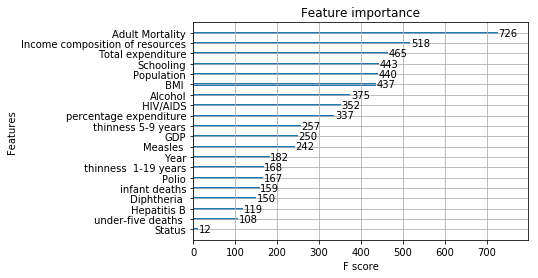

In [12]:
xgb.plot_importance(xgboost_tree)

## Save and Deploy model to Watson Machine Learning

In [13]:
# create client to access our WML service
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
  # Credentials removed for obvious reasons
}

client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)

1.0.376


In [14]:
# Use this cell to do any cleanup of previously created models and deployments
client.repository.list_models()
client.deployments.list()

------------------------------------  --------------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                                CREATED                   FRAMEWORK
7990e5bb-7b5e-4013-af8e-48658eaf33c3  XGBoost model to predict life expectancy            2020-06-14T20:15:01.393Z  scikit-learn-0.19
7abab6e8-bba6-47e9-88b9-b23f1507cb13  Gradient Boosting model to predict life expectancy  2020-06-13T16:55:57.461Z  scikit-learn-0.20
0b0df47c-0e97-45ad-8124-5829bdb3125b  Gradient Boosting model to predict life expectancy  2020-06-13T16:55:07.380Z  scikit-learn-0.20
af2c508f-57df-448f-b717-e686c9432023  Gradient Boosting model to predict life expectancy  2020-06-13T16:46:26.259Z  scikit-learn-0.20
------------------------------------  --------------------------------------------------  ------------------------  -----------------
------------------------------------  -------------------------  -----

In [15]:
meta_props={client.repository.ModelMetaNames.NAME: "XGBoost model to predict life expectancy"}
published_model = client.repository.store_model(model=xgboost_tree, meta_props={client.repository.ModelMetaNames.NAME: "XGBoost model to predict life expectancy"})

In [16]:
# new list of models
client.repository.list_models()

# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

------------------------------------  --------------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                                CREATED                   FRAMEWORK
b961c09b-c01e-4df9-9627-7b831b160e11  XGBoost model to predict life expectancy            2020-06-15T08:44:43.551Z  scikit-learn-0.19
7990e5bb-7b5e-4013-af8e-48658eaf33c3  XGBoost model to predict life expectancy            2020-06-14T20:15:01.393Z  scikit-learn-0.19
7abab6e8-bba6-47e9-88b9-b23f1507cb13  Gradient Boosting model to predict life expectancy  2020-06-13T16:55:57.461Z  scikit-learn-0.20
0b0df47c-0e97-45ad-8124-5829bdb3125b  Gradient Boosting model to predict life expectancy  2020-06-13T16:55:07.380Z  scikit-learn-0.20
af2c508f-57df-448f-b717-e686c9432023  Gradient Boosting model to predict life expectancy  2020-06-13T16:46:26.259Z  scikit-learn-0.20
------------------------------------  --------------------------------

In [17]:
# create deployment
created_deployment = client.deployments.create(model_uid, name="life_expectancy_model_xgb")

# new list of deployments
client.deployments.list()

# get UID of our new deployment
deployment_uid = client.deployments.get_uid(created_deployment)
print("Deployment id: {}".format(deployment_uid))
print(created_deployment)



#######################################################################################

Synchronous deployment creation for uid: 'b961c09b-c01e-4df9-9627-7b831b160e11' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='52d62632-0380-4f00-8a40-0d6649651539'
------------------------------------------------------------------------------------------------


------------------------------------  -------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                       TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
52d62632-0380-4f00-8a40-0d6649651539  life_expectancy_model_xgb  online  DEPLOY_SUCCESS  2020-06-15T08:45:16.96

In [18]:
# get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/12048521-9148-44fa-9f65-4fecbb255880/deployments/52d62632-0380-4f00-8a40-0d6649651539/online


In [19]:
scoring_payload = {
    'fields': ['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
    'values': [[2007, 0, 26, 2, 3.79, 126.698109, 98, 12, 43.9, 2,99, 5.6, 95, 0.1, 1634.81431, 259167, 2.2, 2.4, 0.661, 13]]
}

In [20]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print('prediction',json.dumps(predictions, indent=2))

prediction {
  "fields": [
    "prediction"
  ],
  "values": [
    [
      68.21698760986328
    ]
  ]
}
